In [1]:
import Library.Assign6 as t1
import math
import numpy as np
import matplotlib.pyplot as plt

Question 1: Use RK4 to solve the damped and forced harmonic oscillator satisfying
2y'' + γy' + 2y = 2 cos(ωt), where y(0) = 2, y'(0) = −1

for γ = 0.2 and ω = 1.2.

Solution at t = 150 , are: x = 0.0010274076220541898 , v = 0.0005931952491785627


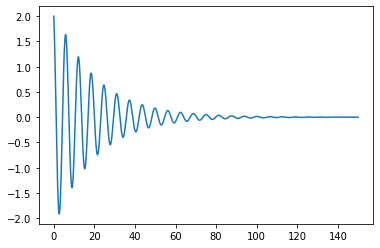

In [2]:
#For damped oscillator (2y'' + 0.2y' + 2y = 0)

def dxdt(x,v,t): 
    return v

def dvdt(x,v,t):
    return -0.5*(0.2*v + 2*x)

T,V,X = t1.CODE1(0,2,-1,dxdt,dvdt,0.1,150)
plt.plot(T,X)

Solution at t = 200 , are: x = -0.14359344686268205 , v = 2.6256616079725044


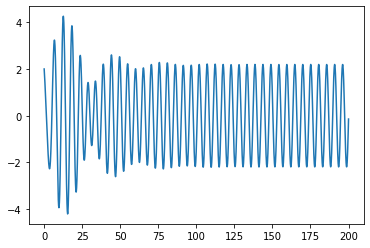

In [3]:
#For damped oscillator (2y'' + 0.2y' + 2y = 2cos(1.2*t))

def dxdt1(x,v,t): 
    return v

def dvdt1(x,v,t):
    return -0.5*(0.2*v + 2*x - 2*np.cos(1.2*t))

T,V,X = t1.CODE1(0,2,-1,dxdt1,dvdt1,0.1,200)
plt.plot(T,X)
plt.show()

Find the dominant eigenvalue and its corresponding normalized eigenvector to a
precision of 10−3 for the matrix given below. How many iterations does it take to achieve this precision?
2 1 2
2 2 −2
3 1 1

In [4]:
A=[[2,1,2],[2,2,-2],[3,1,1]]

x0=[[0.3],[0.6],[1]]

t1.powriter(A,x0,0.001)

Eigenvalue: 4.0034364261168385 , Iterations:  7
[[3026.4], [9.0], [3027.1]]


[[0.7070234469481658], [0.0021025677446912146], [0.707186979994975]]